In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("pima-indians-diabetes-data.csv")
df

Col1  Col2  Col3  Col4  Col5  Col6   Col7  Col8  Target
0       6   148    72    35     0  33.6  0.627    50       1
1       1    85    66    29     0  26.6  0.351    31       0
2       8   183    64     0     0  23.3  0.672    32       1
3       1    89    66    23    94  28.1  0.167    21       0
4       0   137    40    35   168  43.1  2.288    33       1
..    ...   ...   ...   ...   ...   ...    ...   ...     ...
763    10   101    76    48   180  32.9  0.171    63       0
764     2   122    70    27     0  36.8  0.340    27       0
765     5   121    72    23   112  26.2  0.245    30       0
766     1   126    60     0     0  30.1  0.349    47       1
767     1    93    70    31     0  30.4  0.315    23       0

[768 rows x 9 columns]

In [4]:
df.corr()

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
Col1    1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
Col2    0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
Col3    0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
Col4   -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
Col5   -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
Col6    0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
Col7   -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
Col8    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
Target  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            Col8    Target  
Col1    0.544341  0.221898  
Col2    0.263514  0.466581  
Col3    0.239528  0.065068  
Col4   -0.113970  0.074752  
Col5   -0.042163  0.130548  
Col6    0.036242  0.292695  
Col7    0.033561  0.173844  
Col8    1.000000  0.238356  
Target  0.238356  1.000000

# first without normalization , using post pruning decision tree technique

In [5]:
X=df.iloc[:,0:8]

In [6]:
X

Col1  Col2  Col3  Col4  Col5  Col6   Col7  Col8
0       6   148    72    35     0  33.6  0.627    50
1       1    85    66    29     0  26.6  0.351    31
2       8   183    64     0     0  23.3  0.672    32
3       1    89    66    23    94  28.1  0.167    21
4       0   137    40    35   168  43.1  2.288    33
..    ...   ...   ...   ...   ...   ...    ...   ...
763    10   101    76    48   180  32.9  0.171    63
764     2   122    70    27     0  36.8  0.340    27
765     5   121    72    23   112  26.2  0.245    30
766     1   126    60     0     0  30.1  0.349    47
767     1    93    70    31     0  30.4  0.315    23

[768 rows x 8 columns]

In [7]:
y=df.iloc[:,8]

In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Target, Length: 768, dtype: int64

# splitting the data into xtrain,xtest,ytrain,ytest

In [9]:
#Train test split
X_train , X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [10]:
from sklearn.tree import DecisionTreeClassifier
trees=DecisionTreeClassifier() #without max depth

In [11]:
trees.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(499.5911865234375, 525.48, 'X[1] <= 154.5\ngini = 0.455\nsamples = 537\nvalue = [349, 188]'),
 Text(238.471435546875, 489.24, 'X[7] <= 28.5\ngini = 0.383\nsamples = 454\nvalue = [337, 117]'),
 Text(126.421875, 453.0, 'X[1] <= 127.5\ngini = 0.22\nsamples = 238\nvalue = [208, 30]'),
 Text(69.75, 416.76, 'X[5] <= 49.1\ngini = 0.117\nsamples = 192\nvalue = [180, 12]'),
 Text(61.03125, 380.52, 'X[5] <= 31.4\ngini = 0.1\nsamples = 190\nvalue = [180, 10]'),
 Text(17.4375, 344.28, 'X[6] <= 0.672\ngini = 0.018\nsamples = 111\nvalue = [110, 1]'),
 Text(8.71875, 308.04, 'gini = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(26.15625, 308.04, 'X[6] <= 0.697\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(17.4375, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(34.875, 271.8, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(104.625, 344.28, 'X[4] <= 9.0\ngini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(69.75, 308.04, 'X[1] <= 111.5\ngini = 0.384\nsamples = 27\nvalue = [20, 

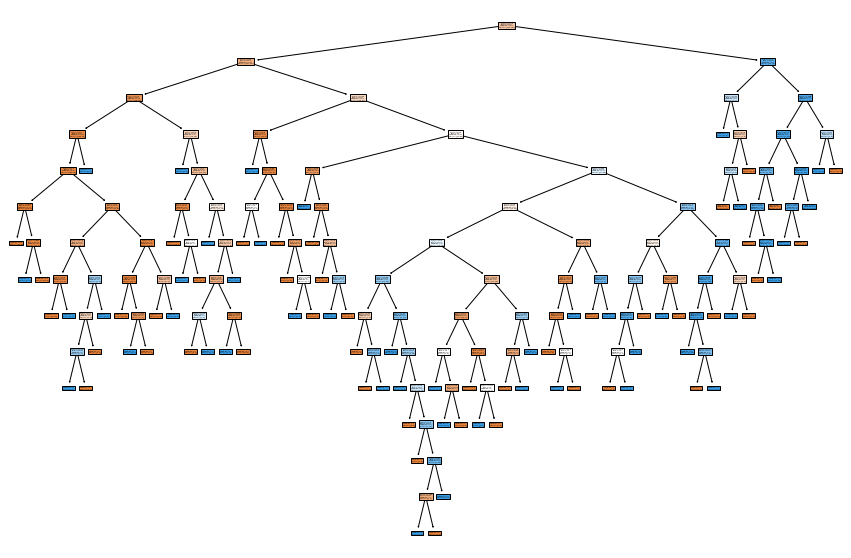

In [14]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(trees,filled=True)

In [15]:
y_pred=trees.predict(X_test)

In [18]:
acc=accuracy_score(y_test,y_pred)
acc                       #without max depth and normalization

0.7012987012987013

In [17]:
cr=pd.DataFrame(data=confusion_matrix(y_test.values,y_pred),index=[0,1],columns=[0,1])
cr

0   1
0  110  41
1   28  52

# now with max depth parameter

In [43]:
from sklearn.tree import DecisionTreeClassifier
trees=DecisionTreeClassifier(max_depth=7)
#7 beacuse , there we can see all features are near to pure split.

In [44]:
trees.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [46]:
from sklearn import tree
plt.figure(figsize=(350,260))
tree.plot_tree(trees,filled=True)

[Text(11517.1875, 13250.249999999998, 'X[1] <= 154.5\ngini = 0.455\nsamples = 537\nvalue = [349, 188]'),
 Text(6260.625, 11483.55, 'X[7] <= 28.5\ngini = 0.383\nsamples = 454\nvalue = [337, 117]'),
 Text(3386.25, 9716.849999999999, 'X[1] <= 127.5\ngini = 0.22\nsamples = 238\nvalue = [208, 30]'),
 Text(2047.5, 7950.15, 'X[5] <= 49.1\ngini = 0.117\nsamples = 192\nvalue = [180, 12]'),
 Text(1732.5, 6183.449999999999, 'X[5] <= 31.4\ngini = 0.1\nsamples = 190\nvalue = [180, 10]'),
 Text(630.0, 4416.75, 'X[6] <= 0.672\ngini = 0.018\nsamples = 111\nvalue = [110, 1]'),
 Text(315.0, 2650.0499999999993, 'gini = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(945.0, 2650.0499999999993, 'X[6] <= 0.697\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(630.0, 883.3500000000004, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(1260.0, 883.3500000000004, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(2835.0, 4416.75, 'X[4] <= 9.0\ngini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(2205.0, 2650.

In [47]:
y_pred=trees.predict(X_test)

In [48]:
acc=accuracy_score(y_test,y_pred)
acc                       #with maxdepth=7 and without normalization

0.7012987012987013

In [49]:
cr=pd.DataFrame(data=confusion_matrix(y_test.values,y_pred),index=[0,1],columns=[0,1])
cr

0   1
0  112  39
1   30  50

In [50]:
#accuracy is same , a little change in predictions

# normalization

In [51]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [52]:
std.fit(X)

StandardScaler()

In [53]:
scaled_features=std.transform(X)
scaled_features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [55]:
df_new=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_new

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0    0.639947  0.848324  0.149641  0.907270 -0.692891  0.204013  0.468492   
1   -0.844885 -1.123396 -0.160546  0.530902 -0.692891 -0.684422 -0.365061   
2    1.233880  1.943724 -0.263941 -1.288212 -0.692891 -1.103255  0.604397   
3   -0.844885 -0.998208 -0.160546  0.154533  0.123302 -0.494043 -0.920763   
4   -1.141852  0.504055 -1.504687  0.907270  0.765836  1.409746  5.484909   
..        ...       ...       ...       ...       ...       ...       ...   
763  1.827813 -0.622642  0.356432  1.722735  0.870031  0.115169 -0.908682   
764 -0.547919  0.034598  0.046245  0.405445 -0.692891  0.610154 -0.398282   
765  0.342981  0.003301  0.149641  0.154533  0.279594 -0.735190 -0.685193   
766 -0.844885  0.159787 -0.470732 -1.288212 -0.692891 -0.240205 -0.371101   
767 -0.844885 -0.873019  0.046245  0.656358 -0.692891 -0.202129 -0.473785   

         Col8  
0    1.425995  
1   -0.190672  
2   -0.105584  
3   -1.041549  
4   -0.020496  
..        ...  
763  2.532136  
764 -0.531023  
765 -0.275760  
766  1.170732  
767 -0.871374  

[768 rows x 8 columns]

In [57]:
#train test split

X_train , X_test, y_train, y_test= train_test_split(scaled_features,df.Target,test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [61]:
from sklearn.tree import DecisionTreeClassifier
trees=DecisionTreeClassifier() #without max depth


In [62]:
trees.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(388.34944581280786, 524.1857142857143, 'X[1] <= 0.207\ngini = 0.457\nsamples = 537\nvalue = [347, 190]'),
 Text(202.80757389162562, 485.3571428571429, 'X[7] <= -0.403\ngini = 0.301\nsamples = 331\nvalue = [270, 61]'),
 Text(109.26354679802955, 446.52857142857147, 'X[5] <= 1.702\ngini = 0.154\nsamples = 190\nvalue = [174, 16]'),
 Text(92.77093596059113, 407.70000000000005, 'X[0] <= 0.937\ngini = 0.13\nsamples = 186\nvalue = [173, 13]'),
 Text(84.52463054187191, 368.8714285714286, 'X[3] <= 0.876\ngini = 0.121\nsamples = 185\nvalue = [173, 12]'),
 Text(45.354679802955665, 330.0428571428572, 'X[5] <= -0.075\ngini = 0.073\nsamples = 158\nvalue = [152, 6]'),
 Text(16.492610837438423, 291.2142857142857, 'X[6] <= 0.604\ngini = 0.019\nsamples = 103\nvalue = [102, 1]'),
 Text(8.246305418719212, 252.3857142857143, 'gini = 0.0\nsamples = 90\nvalue = [90, 0]'),
 Text(24.738916256157637, 252.3857142857143, 'X[6] <= 0.648\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(16.492610837438423,

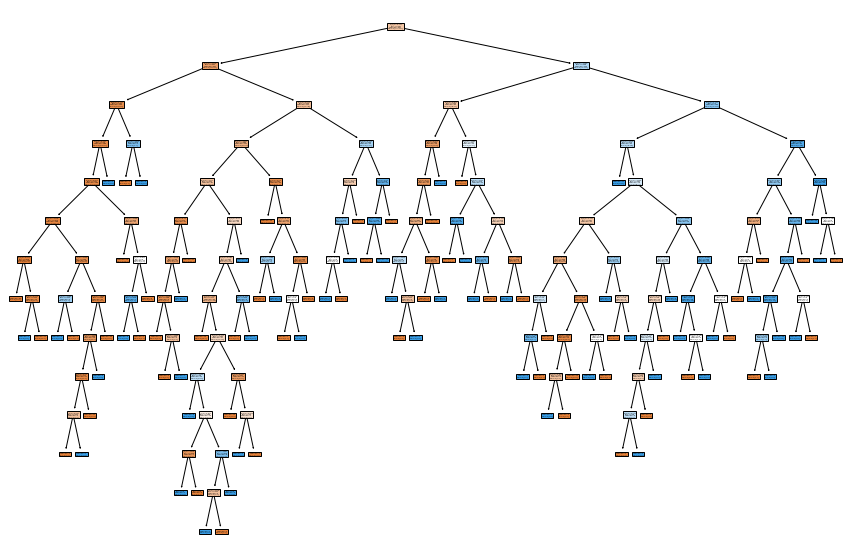

In [63]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(trees,filled=True)

#before normalization : we have 14 depth
#after normalization : we have 13 depth

In [64]:
y_pred=trees.predict(X_test)

In [65]:
acc=accuracy_score(y_test,y_pred)
acc   

0.7142857142857143

In [66]:
cr=pd.DataFrame(data=confusion_matrix(y_test.values,y_pred),index=[0,1],columns=[0,1])
cr

0   1
0  122  31
1   35  43

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       153
           1       0.58      0.55      0.57        78

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.68       231
weighted avg       0.71      0.71      0.71       231



# with max depth and normalization

In [69]:
from sklearn.tree import DecisionTreeClassifier
trees=DecisionTreeClassifier(max_depth=2) #without max depth

In [70]:
trees.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(418.5, 453.0, 'X[1] <= 0.207\ngini = 0.457\nsamples = 537\nvalue = [347, 190]'),
 Text(209.25, 271.8, 'X[7] <= -0.403\ngini = 0.301\nsamples = 331\nvalue = [270, 61]'),
 Text(104.625, 90.59999999999997, 'gini = 0.154\nsamples = 190\nvalue = [174, 16]'),
 Text(313.875, 90.59999999999997, 'gini = 0.435\nsamples = 141\nvalue = [96, 45]'),
 Text(627.75, 271.8, 'X[5] <= -0.259\ngini = 0.468\nsamples = 206\nvalue = [77, 129]'),
 Text(523.125, 90.59999999999997, 'gini = 0.456\nsamples = 54\nvalue = [35, 19]'),
 Text(732.375, 90.59999999999997, 'gini = 0.4\nsamples = 152\nvalue = [42, 110]')]

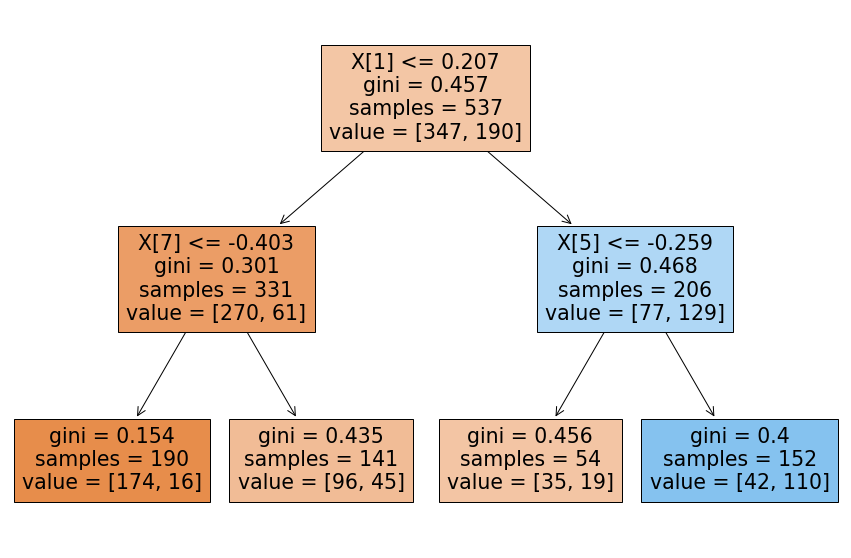

In [71]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(trees,filled=True)

In [72]:
#here we can see ratio between 1 and 0 in features is high , so we move to further more splits.

In [73]:
trees=DecisionTreeClassifier(max_depth=3) 

In [74]:
trees.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(418.5, 475.65000000000003, 'X[1] <= 0.207\ngini = 0.457\nsamples = 537\nvalue = [347, 190]'),
 Text(209.25, 339.75, 'X[7] <= -0.403\ngini = 0.301\nsamples = 331\nvalue = [270, 61]'),
 Text(104.625, 203.85000000000002, 'X[5] <= 1.702\ngini = 0.154\nsamples = 190\nvalue = [174, 16]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.13\nsamples = 186\nvalue = [173, 13]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(313.875, 203.85000000000002, 'X[4] <= 0.544\ngini = 0.435\nsamples = 141\nvalue = [96, 45]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.389\nsamples = 121\nvalue = [89, 32]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(627.75, 339.75, 'X[5] <= -0.259\ngini = 0.468\nsamples = 206\nvalue = [77, 129]'),
 Text(523.125, 203.85000000000002, 'X[1] <= 0.801\ngini = 0.456\nsamples = 54\nvalue = [35, 19]'),
 Text(470.8125, 67.94999999999999, 'gini = 0.293\nsamples = 28\nvalue = [23, 5]'),
 Text(

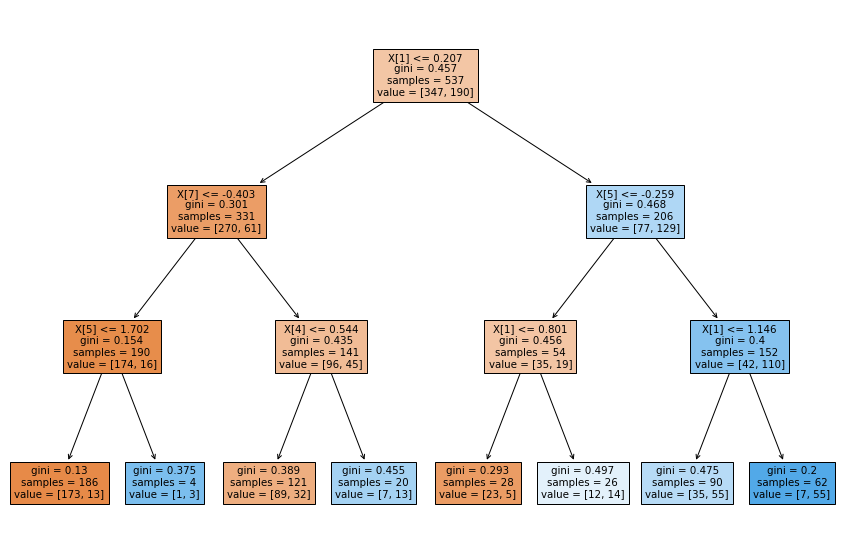

In [75]:
plt.figure(figsize=(15,10))
tree.plot_tree(trees,filled=True)

In [76]:
#32:82 and 12:14 and 35:55 so more split requires

In [77]:
trees=DecisionTreeClassifier(max_depth=4) 

In [78]:
trees.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

[Text(1395.0, 978.48, 'X[1] <= 0.207\ngini = 0.457\nsamples = 537\nvalue = [347, 190]'),
 Text(697.5, 761.0400000000001, 'X[7] <= -0.403\ngini = 0.301\nsamples = 331\nvalue = [270, 61]'),
 Text(348.75, 543.6, 'X[5] <= 1.702\ngini = 0.154\nsamples = 190\nvalue = [174, 16]'),
 Text(174.375, 326.1600000000001, 'X[0] <= 0.937\ngini = 0.13\nsamples = 186\nvalue = [173, 13]'),
 Text(87.1875, 108.72000000000003, 'gini = 0.121\nsamples = 185\nvalue = [173, 12]'),
 Text(261.5625, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(523.125, 326.1600000000001, 'X[6] <= 0.653\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(435.9375, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(610.3125, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1046.25, 543.6, 'X[4] <= 0.544\ngini = 0.435\nsamples = 141\nvalue = [96, 45]'),
 Text(871.875, 326.1600000000001, 'X[4] <= -0.597\ngini = 0.389\nsamples = 121\nvalue = [89, 32]'),
 Text(784.6875, 10

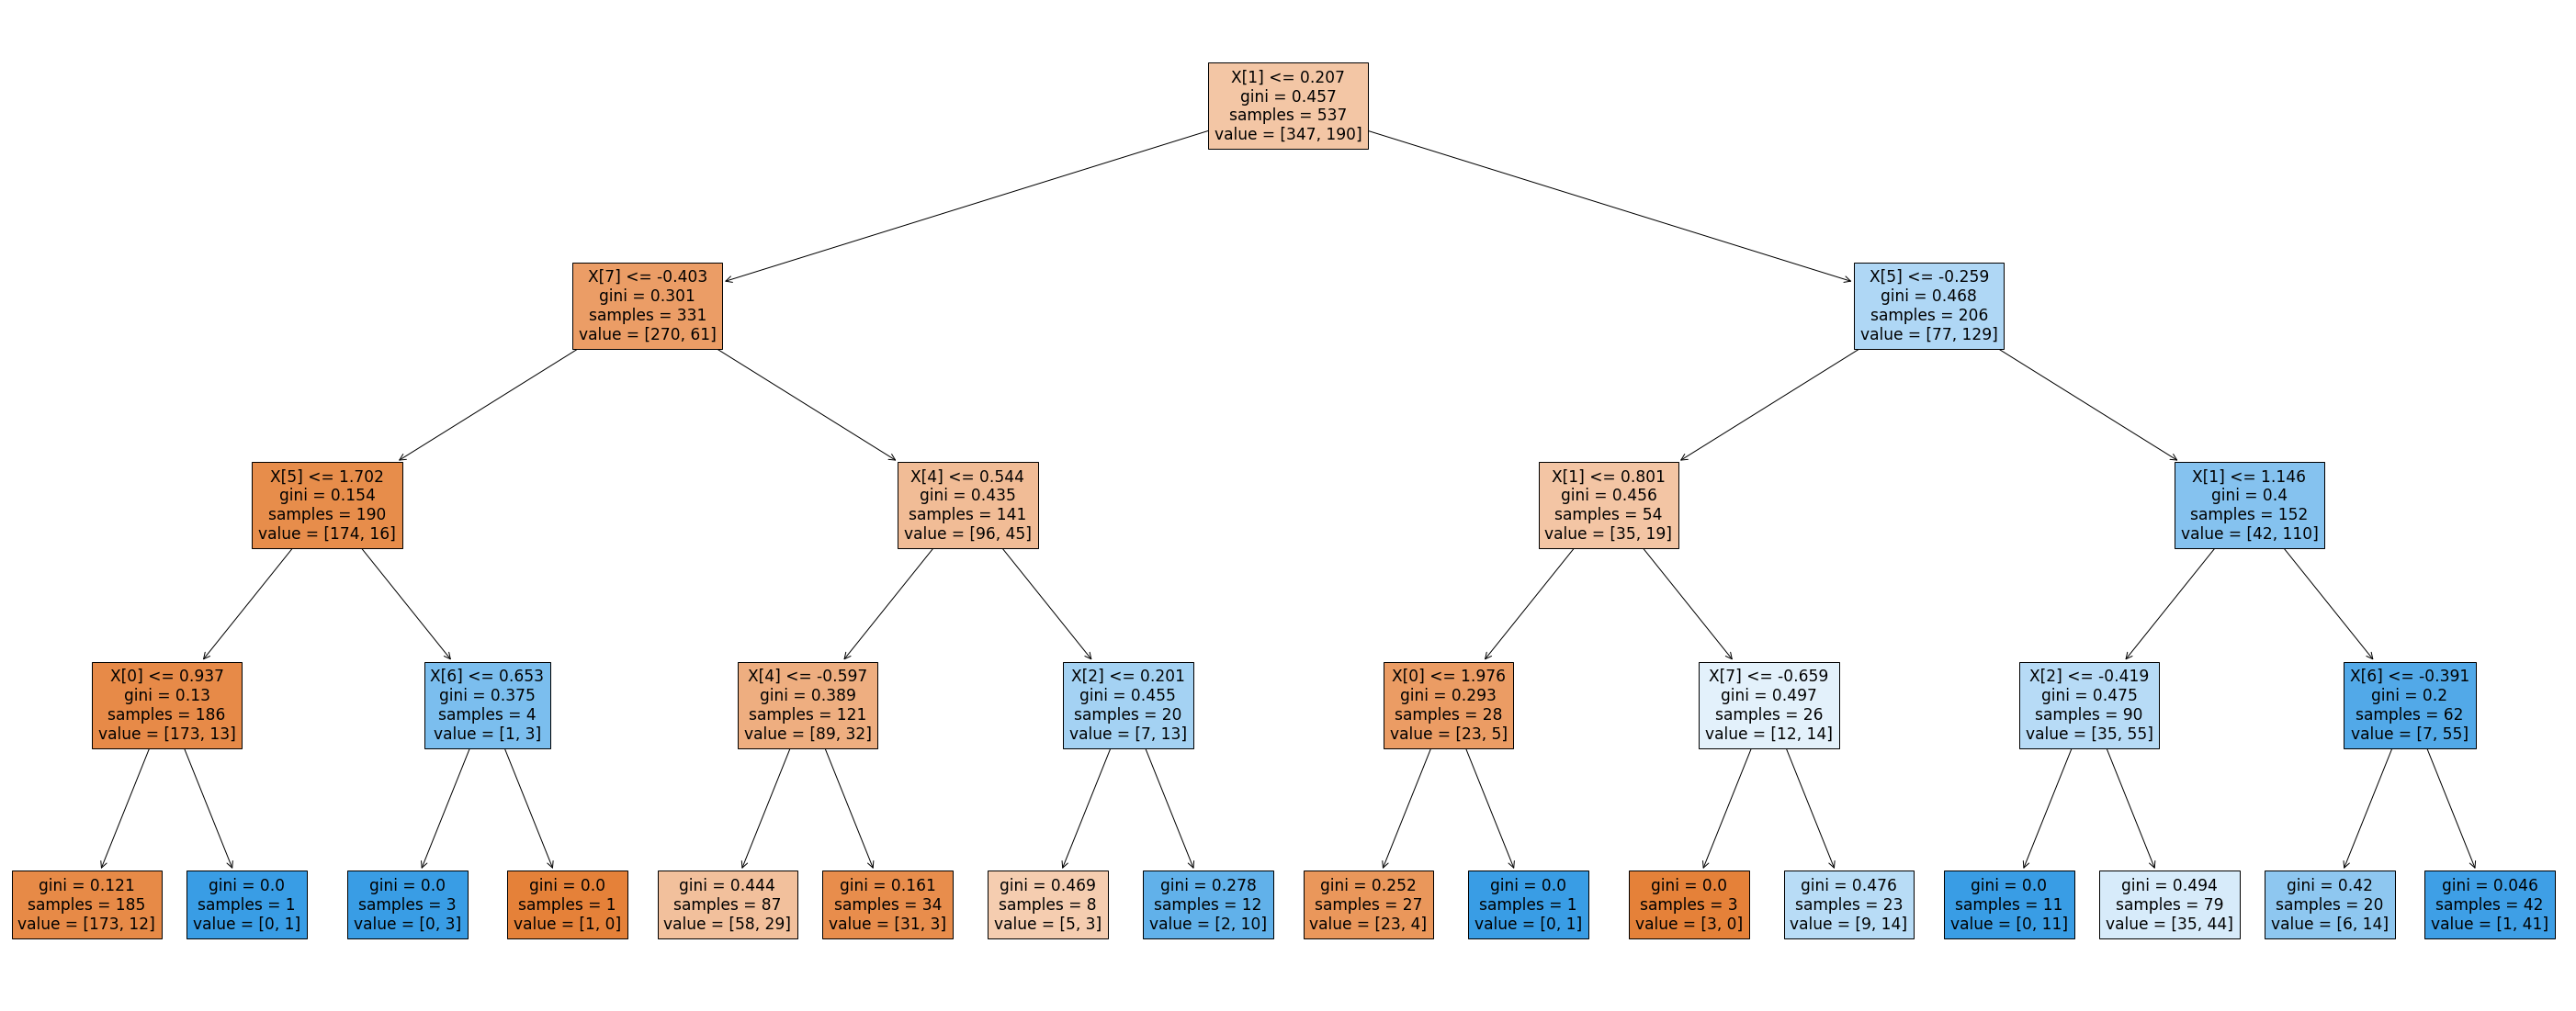

In [82]:
plt.figure(figsize=(50,20))
tree.plot_tree(trees,filled=True)

In [83]:
#two features have impurity split , more split...

In [84]:
trees=DecisionTreeClassifier(max_depth=5) 

In [85]:
trees.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(2683.858695652174, 3986.4, 'X[1] <= 0.207\ngini = 0.457\nsamples = 537\nvalue = [347, 190]'),
 Text(1273.695652173913, 3261.6000000000004, 'X[7] <= -0.403\ngini = 0.301\nsamples = 331\nvalue = [270, 61]'),
 Text(606.5217391304348, 2536.8, 'X[5] <= 1.702\ngini = 0.154\nsamples = 190\nvalue = [174, 16]'),
 Text(363.9130434782609, 1812.0, 'X[0] <= 0.937\ngini = 0.13\nsamples = 186\nvalue = [173, 13]'),
 Text(242.6086956521739, 1087.1999999999998, 'X[3] <= 0.876\ngini = 0.121\nsamples = 185\nvalue = [173, 12]'),
 Text(121.30434782608695, 362.39999999999964, 'gini = 0.073\nsamples = 158\nvalue = [152, 6]'),
 Text(363.9130434782609, 362.39999999999964, 'gini = 0.346\nsamples = 27\nvalue = [21, 6]'),
 Text(485.2173913043478, 1087.1999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(849.1304347826086, 1812.0, 'X[5] <= 3.066\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(727.8260869565217, 1087.1999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(970.434782608

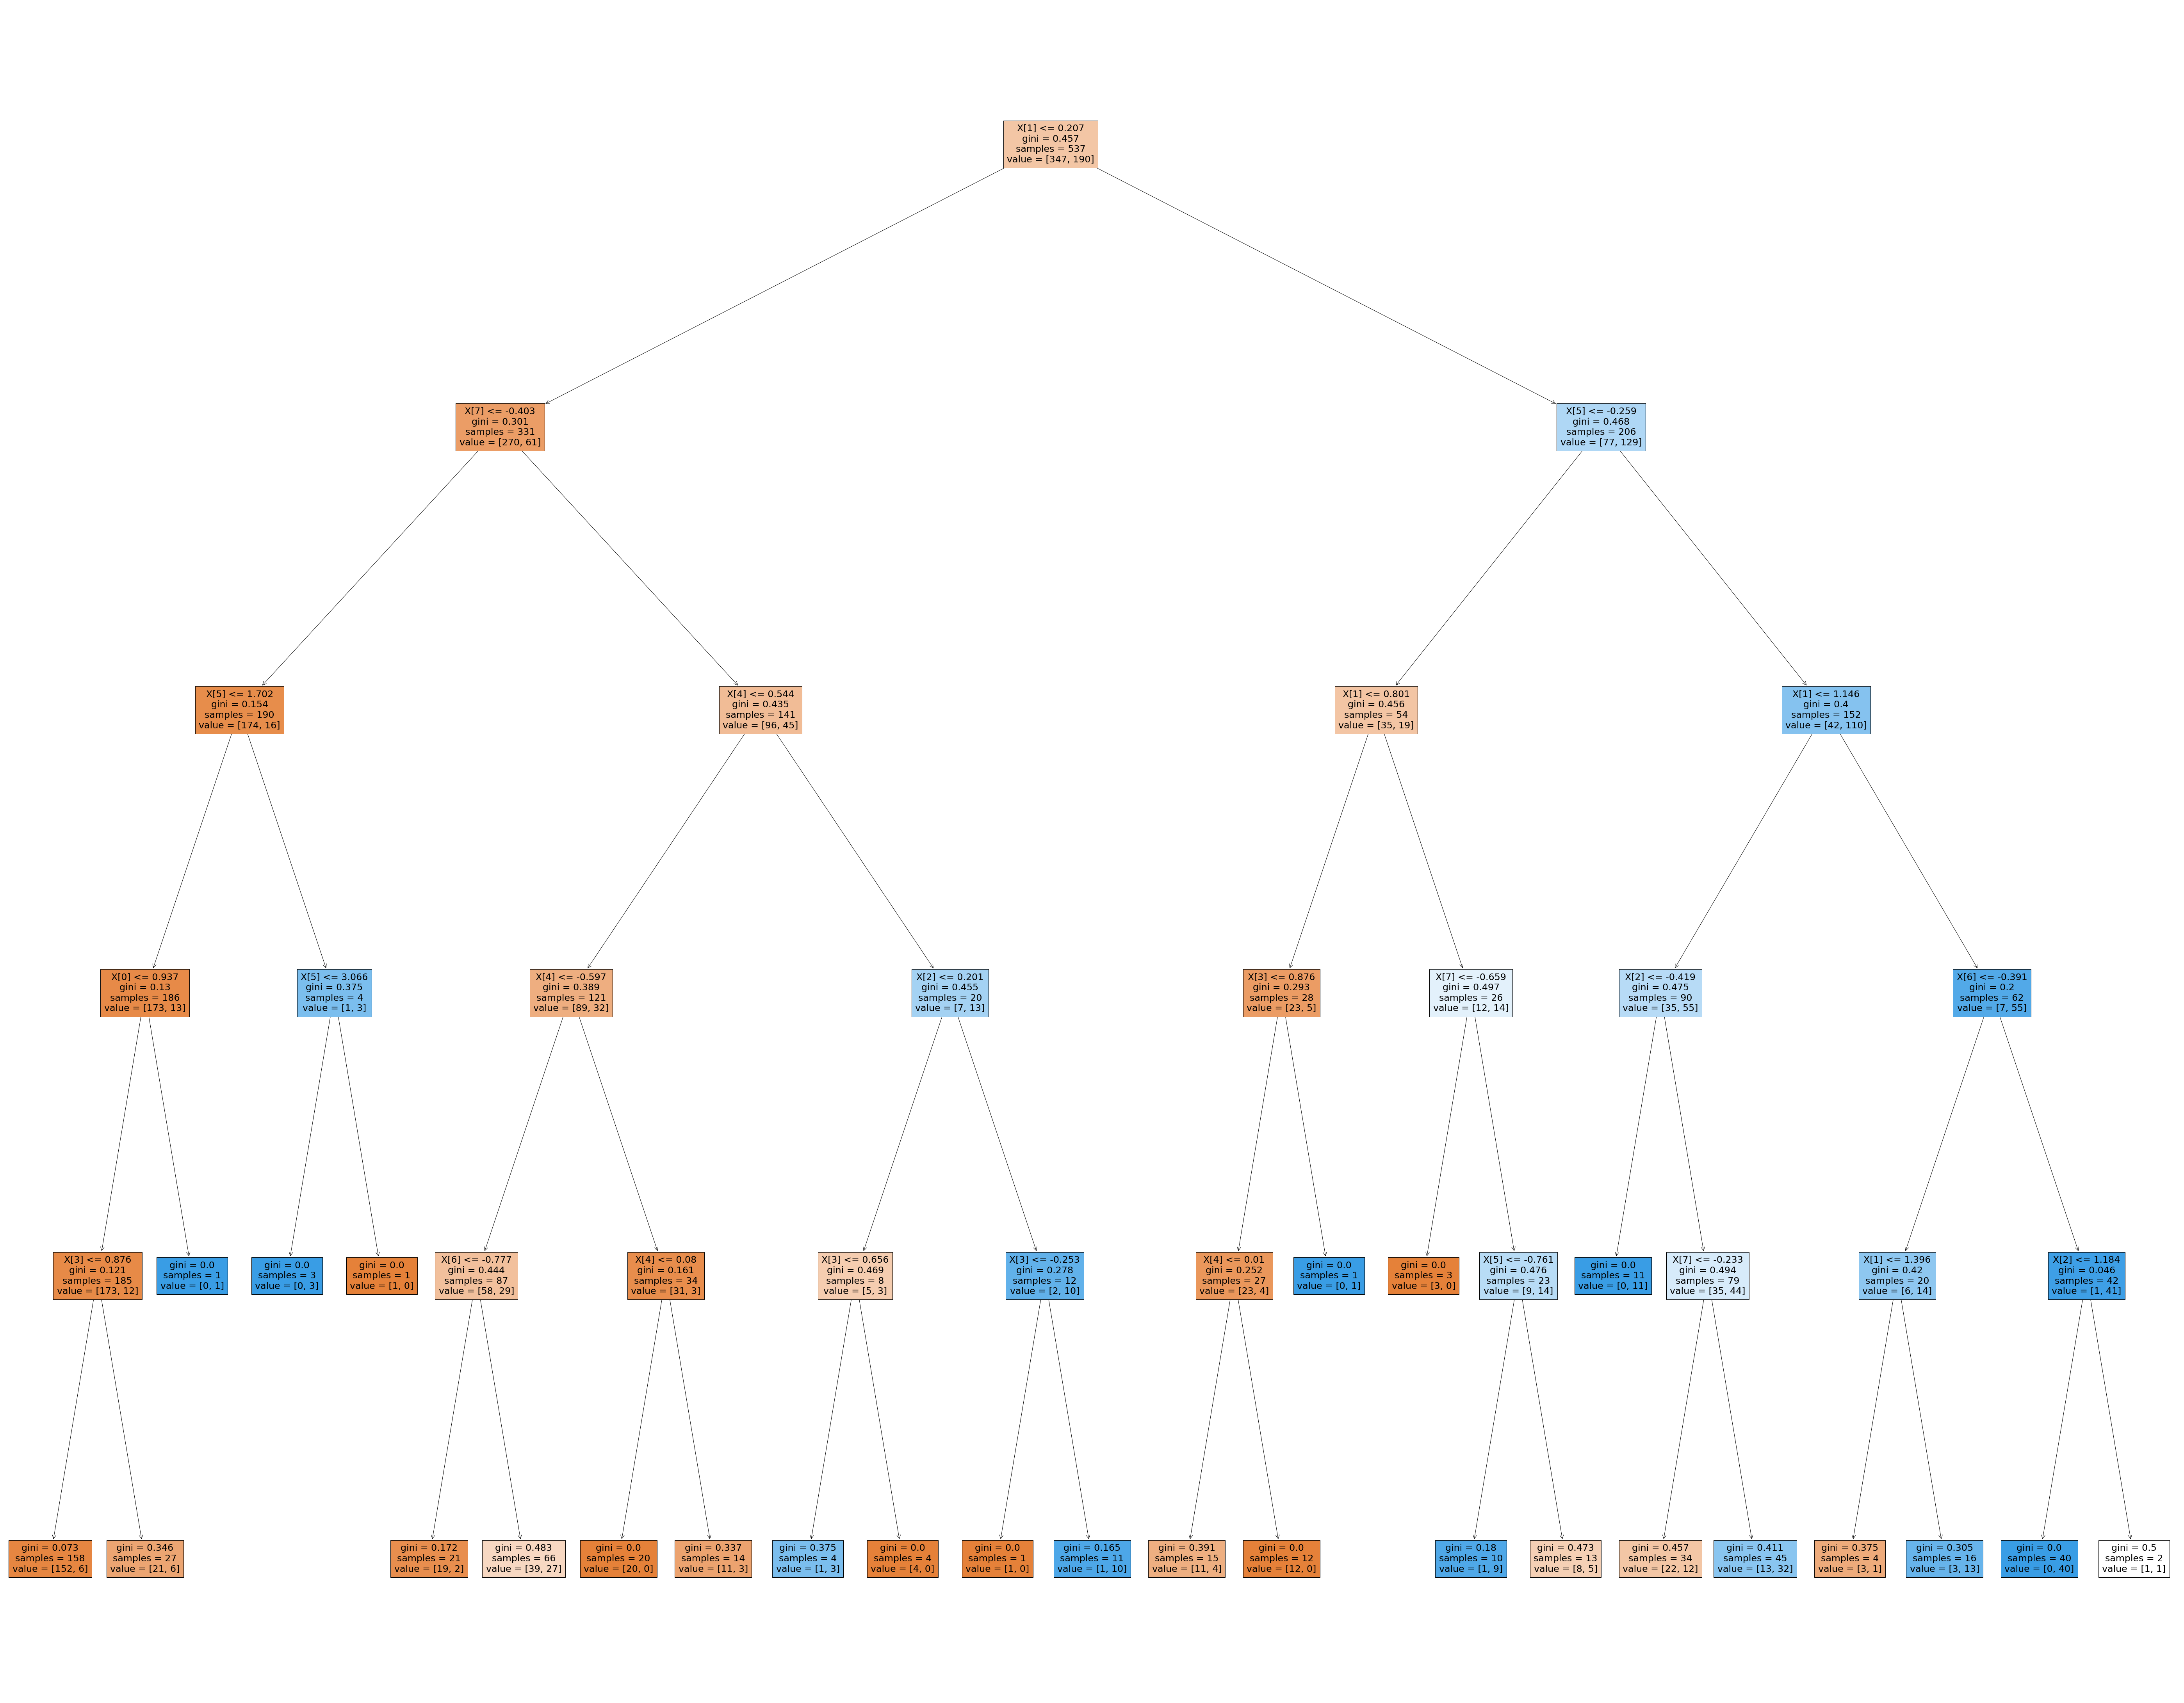

In [87]:
plt.figure(figsize=(100,80))
tree.plot_tree(trees,filled=True)

In [88]:
#one more split for solving a impure feature 

In [89]:
trees=DecisionTreeClassifier(max_depth=6) 

In [90]:
trees.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

[Text(3790.5122950819673, 4038.171428571429, 'X[1] <= 0.207\ngini = 0.457\nsamples = 537\nvalue = [347, 190]'),
 Text(1835.2254098360656, 3416.914285714286, 'X[7] <= -0.403\ngini = 0.301\nsamples = 331\nvalue = [270, 61]'),
 Text(960.4918032786886, 2795.6571428571433, 'X[5] <= 1.702\ngini = 0.154\nsamples = 190\nvalue = [174, 16]'),
 Text(686.0655737704918, 2174.4, 'X[0] <= 0.937\ngini = 0.13\nsamples = 186\nvalue = [173, 13]'),
 Text(548.8524590163935, 1553.1428571428573, 'X[3] <= 0.876\ngini = 0.121\nsamples = 185\nvalue = [173, 12]'),
 Text(274.42622950819674, 931.8857142857146, 'X[5] <= -0.075\ngini = 0.073\nsamples = 158\nvalue = [152, 6]'),
 Text(137.21311475409837, 310.6285714285714, 'gini = 0.019\nsamples = 103\nvalue = [102, 1]'),
 Text(411.63934426229514, 310.6285714285714, 'gini = 0.165\nsamples = 55\nvalue = [50, 5]'),
 Text(823.2786885245903, 931.8857142857146, 'X[6] <= -0.028\ngini = 0.346\nsamples = 27\nvalue = [21, 6]'),
 Text(686.0655737704918, 310.6285714285714, 'gini

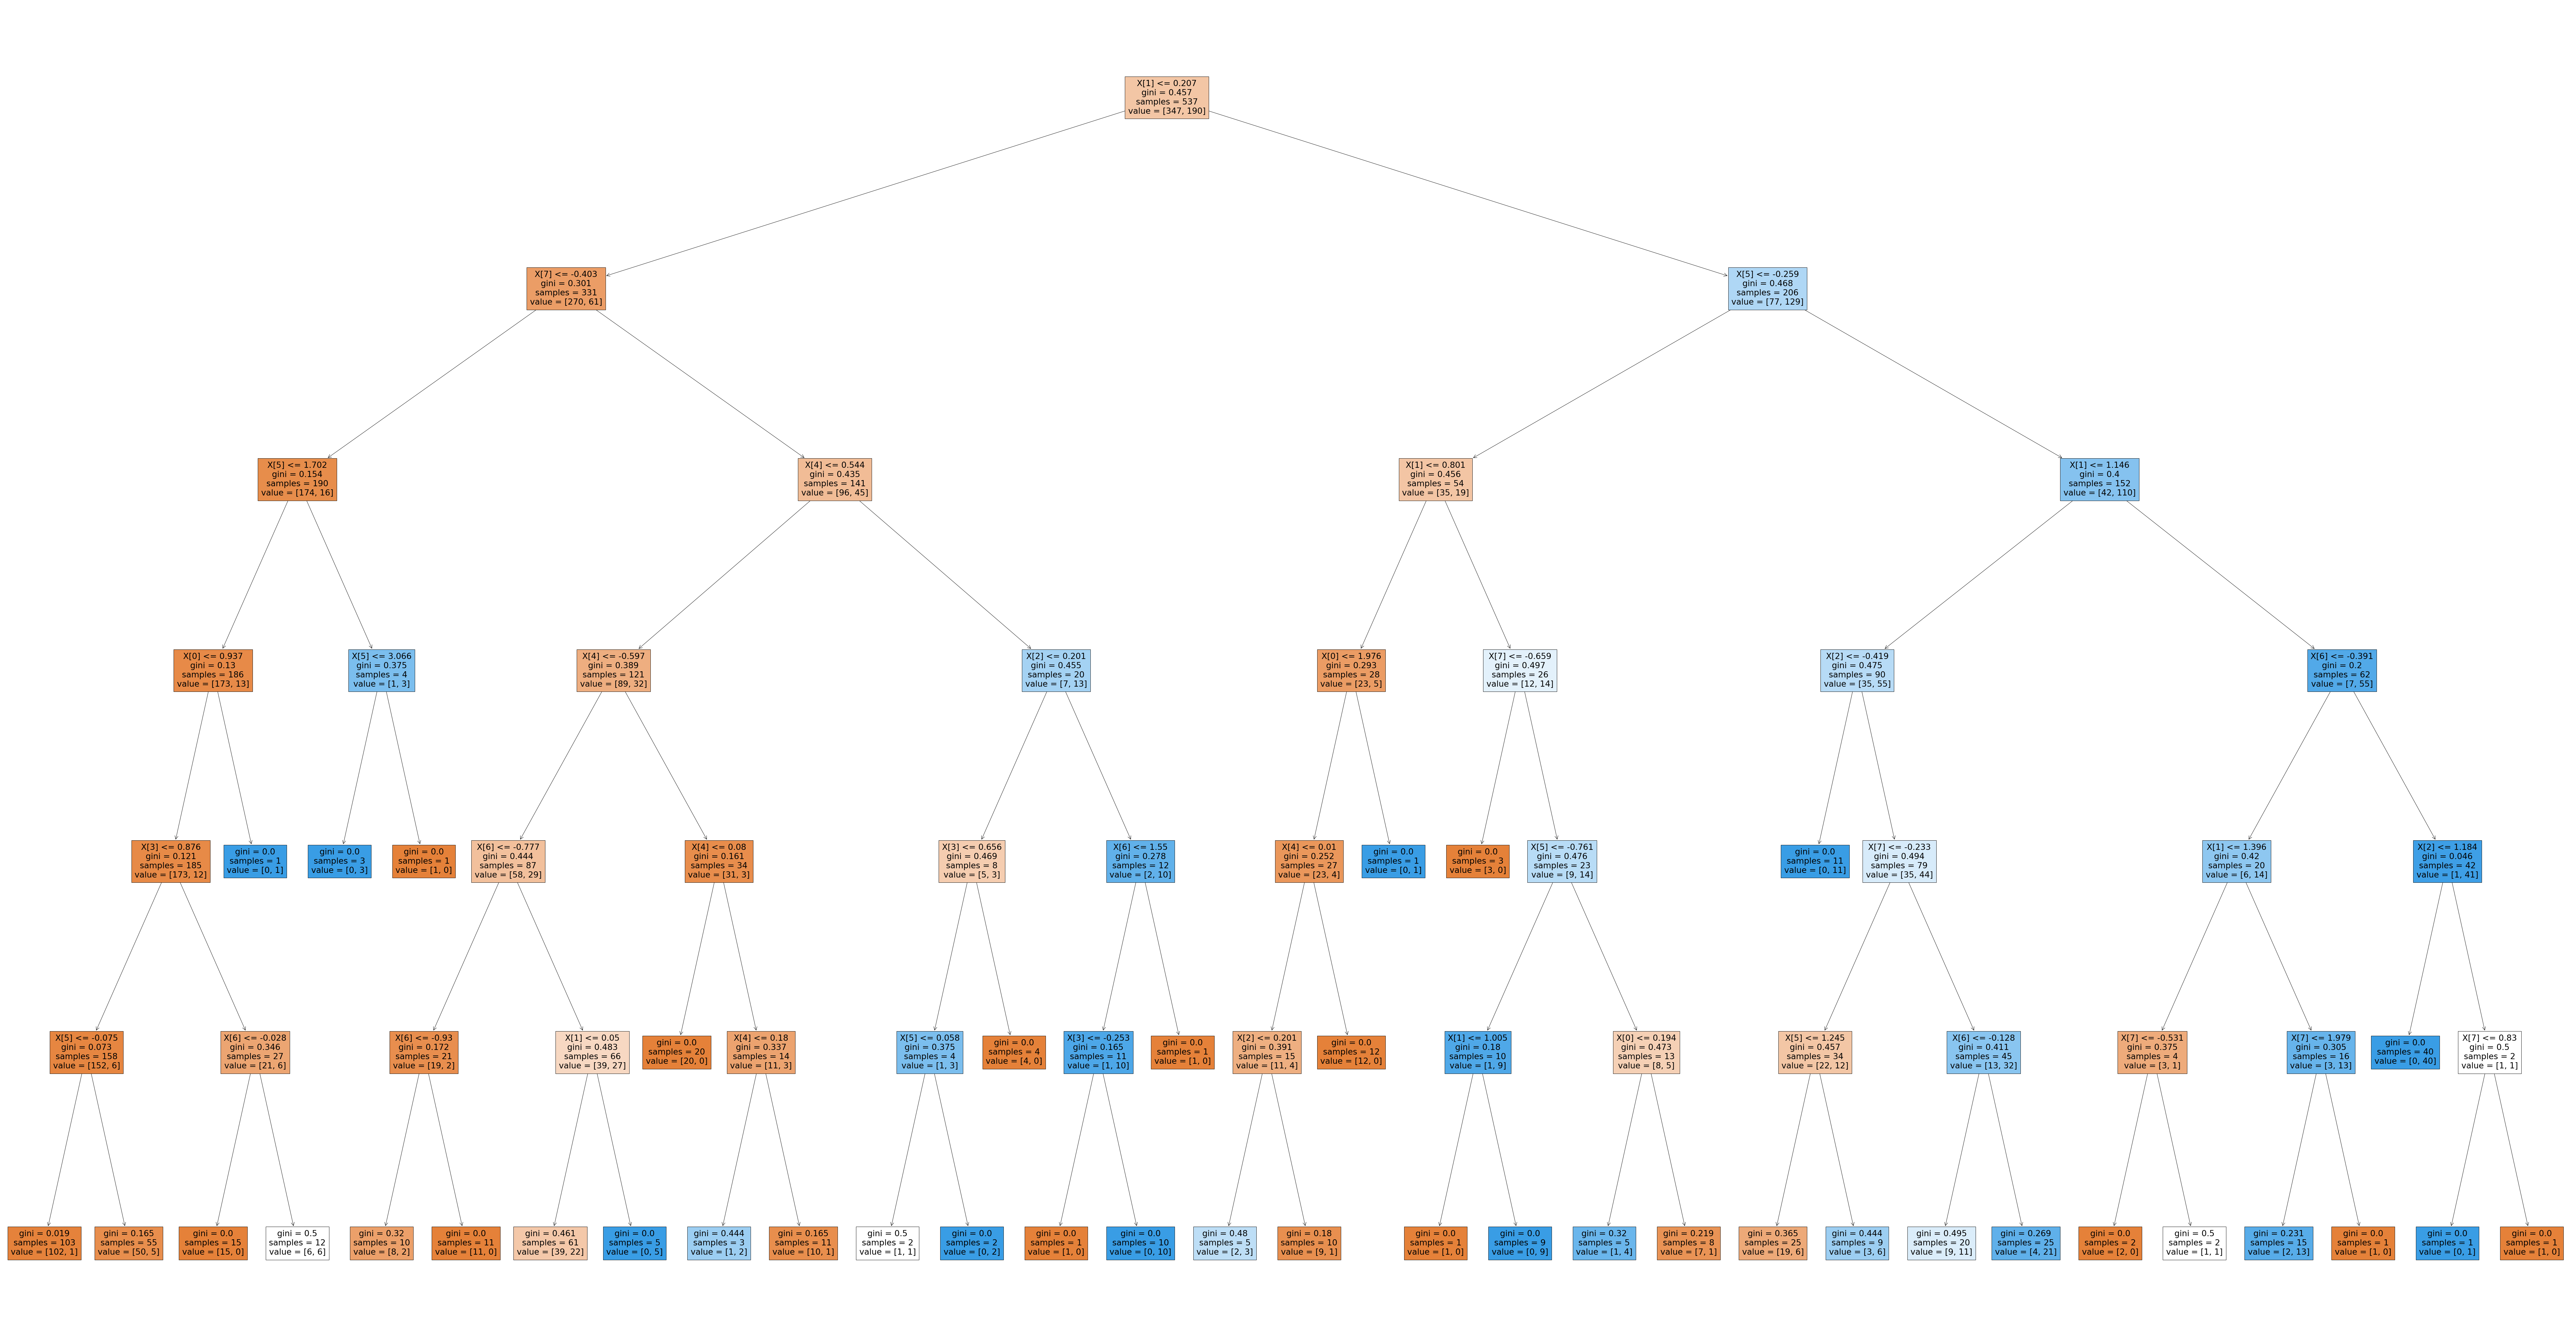

In [91]:
plt.figure(figsize=(150,80))
tree.plot_tree(trees,filled=True)

In [92]:
y_pred=trees.predict(X_test)

In [93]:
acc=accuracy_score(y_test,y_pred)
acc   

0.7532467532467533

In [94]:
cr=pd.DataFrame(data=confusion_matrix(y_test.values,y_pred),index=[0,1],columns=[0,1])
cr

0   1
0  134  19
1   38  40

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       153
           1       0.68      0.51      0.58        78

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



### ??Q1: can we ignore 1 or 2 features which are leading tree to more split?

# Pre pruning technique

In [96]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,6,7,8,9],
    'max_features':['auto','sqrt','log2']
}

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
trees=DecisionTreeClassifier() 

In [ ]:
cv=GridSearchCV(trees,param_grid=parameter,cv=5,scoring='accuracy')